In [1]:
from tkinter import *
from tkinter import ttk

import import_ipynb
import GBA
%run GBA.ipynb
# Import the Gaussian class
# Create the main window
root = Tk()
root.title("HDR Analysis")
# --- create canvas with scrollbar ---
mainframe = ttk.Frame(root, padding="3 3 12 12")
mainframe.grid(column=0, row=0, sticky=(N, W, E, S))
root.columnconfigure(0, weight=1)
root.rowconfigure(0, weight=1)
# # Create variables to store the user's answers to the questions
generate_var = StringVar()
generate_var.set("select") # default value
import_png_var = StringVar()
import_png_var.set("select") # default value
noise_var = StringVar()
noise_var.set("select") # default value
datatype_var = StringVar()
datatype_var.set("select") # default value
multi_var = StringVar()
multi_var.set("select") # default value
method_var = StringVar()
method_var.set("select") # default value

# Create labels and dropdown menus for each question
generate_label = Label(mainframe, text="Do you want to generate \n a single beam?")
generate_label.grid(column=0, row=0, sticky=(W,E))
generate_menu = OptionMenu(mainframe, generate_var, "Yes", "No","select")
generate_menu.grid(column=0, row=1, sticky=(N,S))

multi_label = tk.Label(mainframe, text="Do you want to generate \n multiple beams?")
multi_label.grid(column=1, row=0, sticky=(W,E))
multi_menu = OptionMenu(mainframe, multi_var, "Yes", "No", "select")
multi_menu.grid(column=1, row=1, sticky=(N,S))

noise_label = tk.Label(mainframe, text="Do you want noise?")
noise_label.grid(column=2, row=0, sticky=(W,E))
noise_menu = OptionMenu(mainframe, noise_var, "Yes", "No", "select")
noise_menu.grid(column=2, row=1, sticky=(N,S))

import_png_label = tk.Label(mainframe, text="Do you have images to import?")
import_png_label.grid(column=0, row=2, sticky=(W,E))
import_png_menu = OptionMenu(mainframe, import_png_var, "Yes", "No", "select")
import_png_menu.grid(column=0, row=3, sticky=(N,S))

datatype_label = tk.Label(mainframe, text="Which data type would you \n like to center?")
datatype_label.grid(column=1, row=2, sticky=(W,E))
datatype_menu = OptionMenu(mainframe, datatype_var, "select", "SIM", "PNG")
datatype_menu.grid(column=1, row=3, sticky=(N,S))



method_label = tk.Label(mainframe, text="Which method would you \n like to try?")
method_label.grid(column=2, row=2, sticky=(W,E))
method_menu = OptionMenu(mainframe, method_var, "select", "Center of Mass", "Peak Intensity", "Pattern Matching")
method_menu.grid(column=2, row=3, sticky=(N,S))

output = StringVar()
ttk.Label(mainframe, textvariable=output).grid(column=1, row=5, sticky=(N, W, E, S))

# # Create a function that will be called when the user clicks the submit button
def submit():
    # Create a Gaussian object with the default values
    gaussian = Gaussian(2, 0, 0, 0.4, 0.4, 4, 4, .03, 0, .005)

    # GENERATE
    if generate_var.get() == "Yes":
        gaussian.generate()
        print("generated 5 single beams")
    elif generate_var.get() == "No" or generate_var.get() == "select":
        print("no single beam")
        pass
    #GENERATE MULTIPLE BEAMS
    if multi_var.get() == "Yes":
        gaussian.generate_multi()
        print("generated 5 multi beams")
    elif multi_var.get() == "No" or multi_var.get() == "select":
        print("no multi beams")
        pass
        
# SORT NOISE WITH NUMBER OF BEAMS 
    # IMPORT PNG
    if import_png_var.get() == "Yes":
        gaussian.importim()
        print("thank you for the images :) \n")
    else: 
        print("no images")
        pass

    # GENERATE NOISE
    if noise_var.get() == "Yes":
        gaussian.generate_noise()
        print("noise = yes :) \n" )
        gaussian.final_sim_beam()
    elif noise_var.get() == "No":
        gaussian.generate_no_noise()
        print("noise = no :( \n")
        gaussian.final_sim_beam()
    elif noise_var.get() == "select":
        pass
    else: 
        print("error with noise")

    if datatype_var.get() == "select":
        pass
    elif datatype_var.get() == "SIM" and method_var.get() == "Center of Mass":
        gaussian.simCOM()
    elif datatype_var.get() == "SIM" and method_var.get() == "Peak Intensity":
        gaussian.simPI()
    elif datatype_var.get() == "SIM" and method_var.get() == "Pattern Matching":
        gaussian.simPM()

    else:
        print("help with sim method")
        pass
    
    if datatype_var.get() == "PNG" and method_var.get() == "Center of Mass":
        gaussian.senddataCOM()
    elif datatype_var.get() == "PNG" and method_var.get() == "Peak Intensity":
        gaussian.senddataPI()
    elif datatype_var.get() == "PNG" and method_var.get() == "Pattern Matching":
        gaussian.senddataPM()

    else:
        print("help with png method")
        pass
    return


# Create the submit button
submit_button = Button(mainframe, text="Submit", command=submit)
submit_button.grid(column=3, row=4, sticky=(N,S))


# Start the GUI event loop


root.mainloop()


importing Jupyter notebook from GBA.ipynb
no single beam
no multi beams
thank you for the images :) 

help with sim method


Image size: 1620 x 1220
Image data type: uint8
Image color space: 40


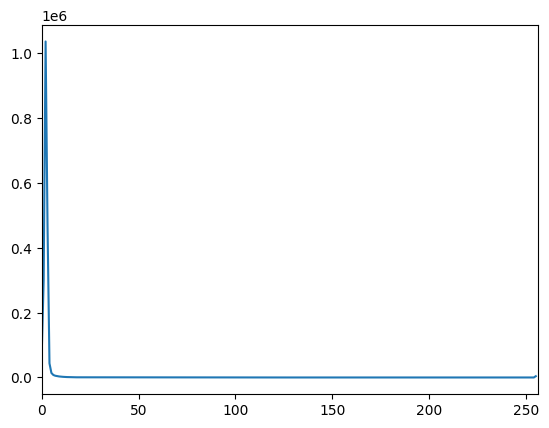

In [2]:
#Mini_setting_4_7.png
from PIL import Image
import matplotlib.pyplot as plt
import cv2

# Load the image
# img = cv2.imread('Mini_setting_1_1.png')
img = cv2.imread('CroppedMini_setting_4_1.png')

# Find the size of the image using the shape attribute
height, width, channels = img.shape
print(f"Image size: {width} x {height}")
print(f"Image data type: {img.dtype}")
print(f"Image color space: {cv2.COLOR_BGR2HSV}")
# Calculate the histogram of the blue channel
hist = cv2.calcHist([img], [0], None, [256], [0, 256])

# Plot the histogram using matplotlib
plt.plot(hist)
plt.xlim([0, 256])
plt.show()

# Identify the pixel location that you want to highlight
x, y =605, 825  # replace with the actual pixel location

# Create a copy of the image and draw a circle around the pixel
highlighted_img = img.copy()
cv2.circle(highlighted_img, (y, x), radius=2, color=(0, 0, 255), thickness=-50)

# Display the highlighted image
cv2.imshow('Highlighted Image', highlighted_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

Image size: 389 x 389
Image data type: uint8
Image color space: 40


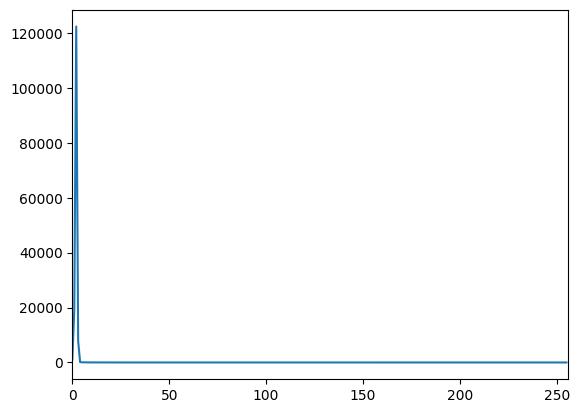

In [20]:
import cv2

# Load the image
img = cv2.imread('Mini_setting_1_1.png')
# img = cv2.imread('croppedMini_setting_1_1.png')

# Find the size of the image using the shape attribute
height, width, channels = img.shape
print(f"Image size: {width} x {height}")
print(f"Image data type: {img.dtype}")
print(f"Image color space: {cv2.COLOR_BGR2HSV}")
# Calculate the histogram of the blue channel
hist = cv2.calcHist([img], [0], None, [256], [0, 256])

# Plot the histogram using matplotlib
plt.plot(hist)
plt.xlim([0, 256])
plt.show()

# Identify the pixel location that you want to highlight
x, y = 0, 190  # replace with the actual pixel location

# Create a copy of the image and draw a circle around the pixel
highlighted_img = img.copy()
cv2.circle(highlighted_img, (y, x), radius=2, color=(0, 0, 255), thickness=-50)

# Display the highlighted image
cv2.imshow('Highlighted Image', highlighted_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

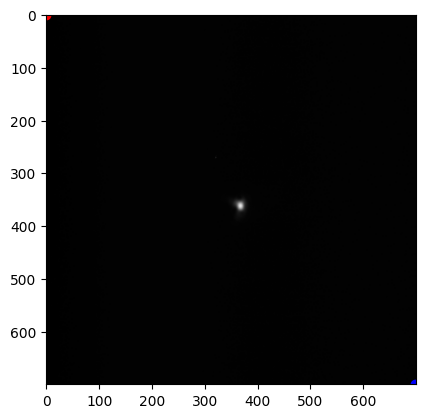

In [2]:
from PIL import Image
import matplotlib.pyplot as plt

# Load the image
image = Image.open('Mini_setting_1_1.png')

# Get the width and height of the image
width, height = image.size

# Get the top left and bottom right pixels
top_left_pixel = image.getpixel((226, 232)
bottom_right_pixel = image.getpixel((width-1, height-1))

# Plot the image
plt.imshow(image)

# Plot the top left and bottom right pixels
plt.scatter(0, 0, color='red')
plt.scatter(width-1, height-1, color='blue')

# Show the plot
plt.show()